In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('flights_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
1,2008,1,3,4,19:37,18:30,20:37,19:40,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
2,2008,1,3,4,16:44,15:10,18:45,17:25,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
4,2008,1,3,4,13:23,12:55,15:26,15:10,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0


### Nivell 1

# Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

## Exploratori Data Analysis (EDA)

In [3]:
y = target = df['ArrDelay']
print(y.shape)

(1247484,)


+ quines variables fem servir pels features (X)?

In [4]:
# mirem variables numeriques
X = df[['ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
print(X.shape)

(1247484, 12)


In [5]:
X.head()

,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,90.0,90.0,77.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
1,240.0,250.0,230.0,67.0,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
2,121.0,135.0,107.0,94.0,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
3,228.0,240.0,213.0,27.0,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
4,123.0,135.0,110.0,28.0,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0


In [ ]:
# existeix alguna correlació entre aquestes variables numeriques?
corr = X.corr()
sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

+ hem de seleccionar aquelles variables independents i que tinguin poca correlacio entre elles al model final. Si no fos aixi s'introdueix error al modelatge
+ ActualElapsedTime and CRSElapsedTime estan molt relacionades (una es el valor real i l'altre el esperat)
+ AirTime i Distance tambe estan molt relaciondes : speed = Distance/time
+ DepDelay amb CarrierDelay, Weatherdelay,NSAdelay,etc tambe hi ha força correlacio

In [ ]:
# visualitzem la relacio entre aquestes dues variables relacionades
sns.scatterplot(x='ActualElapsedTime',y = 'CRSElapsedTime',data=X)

In [ ]:
sns.scatterplot(x='LateAircraftDelay', y='DepDelay',hue='CarrierDelay',data=X)

+ quan l'avio anterior arriba tard fa que l'avio actual surti tard en molts casos (hi ha correlació) sempre i quan el CarrierDelay sigui petit

+ hi han força valors que no semblen tenir correlacio amb CarrierDelay > 1000, la resta si hi ha una correlacio important entre aquestes variables

In [ ]:
df.describe().round(2)

+ veiem que DepDelay,WeatherDelay,CarrierDelay,etc... tienen desviaciones respecto la media alta (**std** alto)

In [ ]:
# anem a mirar si hi han molts outliers dins de cada columna
box = X.boxplot(rot=90)

In [ ]:
df[df['Distance']>4960]

+ tot i que hi han outliers no els trec perque per exemple un vol amb una distancia molt llarga (considerat outlier) no significa que sigui una anomalia. Aquests vols van de NEWPORT (NEW YORK) a HONOLULU (HAWAI) o viceversa

+ de la mateixa manera cada columna te els seus outliers pero s'hauria de mirar un a un si es treuen o no

#### faig servir totes les dades per aquest primer exercici

In [7]:
# model de regressio 1: lineal
from sklearn.linear_model import LinearRegression
# metode lineal basat en Ordinary Least Squares (OLS)
linear_model = LinearRegression()

[ 0.4239248  -0.68914264  0.26529368  0.70060384 -0.          0.24452625
  0.26962562  0.29828524  0.29743351  0.30116107  0.05401889  0.29813765]


/home/vant/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3052921.7944291723, tolerance: 460449.58999871474
  model = cd_fast.enet_coordinate_descent(


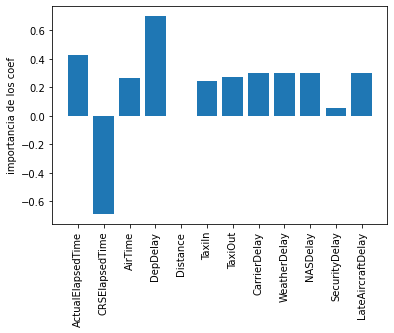

In [8]:
# model de regressio 2: Lasso Regressor
# model lineal pero que penalitza incloure moltes variables o variables amb coficients grans
# LASSO regression is a variation of linear regression specifically adapted for data that shows
# heavy multicollinearity (heavy correlation of features with each other). 
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X,y)
print(lasso_model.coef_)
plt.bar(X.columns,lasso_model.coef_)
plt.xticks(rotation=90)
plt.ylabel('importancia de los coef')
plt.show()

+ Distance no parece tener importancia para el modelo

In [14]:
# check if the target is within the features
'ArrDelay' in X.columns

False

In [15]:
# model de regressio 3: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()

# Exercici 2

Compara’ls en base al MSE i al R2 .

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [17]:
modelos = [linear_model,lasso_model,decision_tree_model]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

modelo: LinearRegression() R2 score: 1.0, MSE: 1.4623997209850364e-26


/home/vant/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3052921.7944291723, tolerance: 460449.58999871474
  model = cd_fast.enet_coordinate_descent(


modelo: Lasso() R2 score: 0.999918738990765, MSE: 0.2999364992668424
modelo: DecisionTreeRegressor() R2 score: 1.0, MSE: 0.0


### com es possible que surti R2 score =1 ?? overfitting per no separar train/test sets?

# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [18]:
# find the best alpha parameter
from sklearn.linear_model import LassoCV
alpha = np.logspace(-8, 2, 10)
print(alpha)
lasso_model = LassoCV(alphas=alpha)
lasso_model.fit(X, y)
print(f'the best alpha is {lasso_model.alpha_}')


[1.00000000e-08 1.29154967e-07 1.66810054e-06 2.15443469e-05
 2.78255940e-04 3.59381366e-03 4.64158883e-02 5.99484250e-01
 7.74263683e+00 1.00000000e+02]
the best alpha is 1e-08


In [19]:
linear = LinearRegression()
lasso = Lasso(alpha=1E-8,normalize=True) # if normalize =True all variable are in the same scale
tree = DecisionTreeRegressor(criterion='mse',max_depth= 20,min_samples_leaf=1)
# for tree, the higher the max_depth can lead to OVERFITTING...

In [20]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 1.0, MSE: 1.4623997209850364e-26
modelo: Lasso(alpha=1e-08, normalize=True) R2 score: 0.9999998096413107, MSE: 0.0007026188744636177
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9994514130651461, MSE: 2.024848649218219


# Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)



In [21]:
from sklearn.model_selection import train_test_split,cross_val_score

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [23]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    R2 = r2_score(y_test,y_pred) 
    mse = MSE(y_test,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 1.0, MSE: 1.4713108632734927e-26
modelo: Lasso(alpha=1e-08, normalize=True) R2 score: 0.9999998053019212, MSE: 0.0007154566578822911
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9962632252839349, MSE: 13.731518909513213


In [24]:
# calculo R2 score usando cross validation para ser menos sensible a como dividimos los datos entre train i test 
modelos = [linear,lasso,tree]
for model in modelos:
    cv_results = cross_val_score(model, X, y, cv=5)   
    print(f'modelo: {str(model)} R2 score: {np.mean(cv_results)}')

modelo: LinearRegression() R2 score: 0.9999999990719701
modelo: Lasso(alpha=1e-08, normalize=True) R2 score: 0.9999997998440012
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9959331083572852


### Nivell 2



# Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció



In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
df_subset.head()

In [ ]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_subset),columns=df_subset.columns)

In [ ]:
df_scaler.head()

In [ ]:
sns.histplot(df_subset['ArrDelay'],color='black',alpha=0.5,bins=100)

In [ ]:
sns.histplot(df_scaler['ArrDelay'],color='red')
plt.xlim([-2,5])

In [ ]:
X_new,y_new = get_X_y_from_dataset(dataframe=df_scaler,target_colum='ArrDelay')

X_train_new,X_test_new,y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.3)

In [ ]:
df_scaler.head()

In [ ]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train_new,y_train_new)
    y_pred = model.predict(X_test_new)    
    R2 = r2_score(y_test_new,y_pred) 
    mse = MSE(y_test_new,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

+ R2 score se mantien igual pero MSE baja

### Nivell 3


# Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [ ]:
df_final = df_scaler.drop('DepDelay',axis=1)
X,y = get_X_y_from_dataset(dataframe=df_final,target_colum='ArrDelay')

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train_new,y_train_new)
    y_pred = model.predict(X_test_new)    
    R2 = r2_score(y_test_new,y_pred) 
    mse = MSE(y_test_new,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

+ el resultat final no varia massa per tant DepDelay no es una de les variables que serveixen a l'hora de contruir aquesta regressio per predir el ArrDelay

### como es possible que DepDelay no importe si tiene una fuerte correlation con ArrDelay ?

